```
#How many states this US state borders
SELECT ?state ?stateLabel ?borders
WHERE
{
  {
    SELECT ?state (COUNT(?otherState) as ?borders)
    WHERE
    {
    ?state wdt:P31 wd:Q35657 .
    ?otherState wdt:P47 ?state .
    ?otherState wdt:P31 wd:Q35657 .
    }
    GROUP BY ?state
  }
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
  }
}        
ORDER BY DESC(?borders)
```

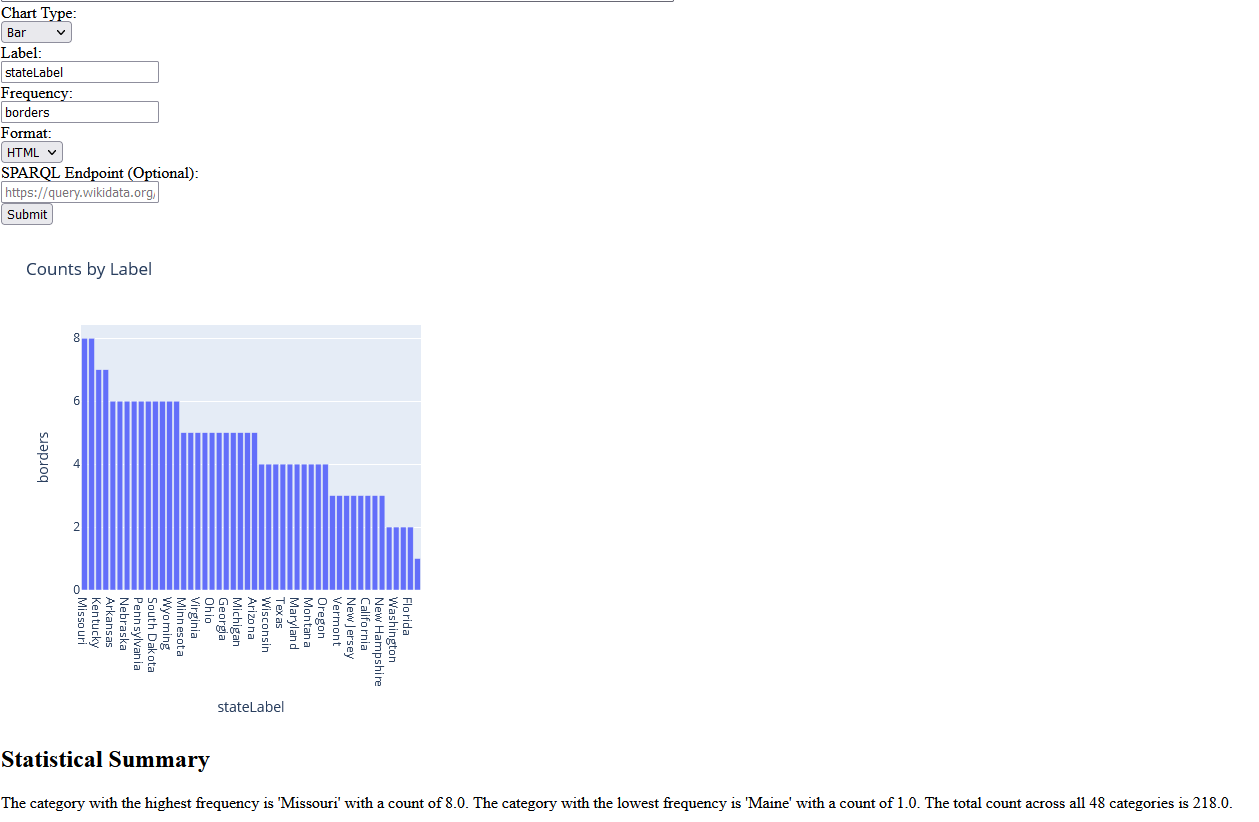

```
SELECT ?continent ?continentLabel (SUM(?population) AS ?totalPopulation)
WHERE {
  ?continent wdt:P31 wd:Q5107 .
  ?country wdt:P30 ?continent .
  ?country wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?continent ?continentLabel
HAVING (BOUND(?totalPopulation))
```

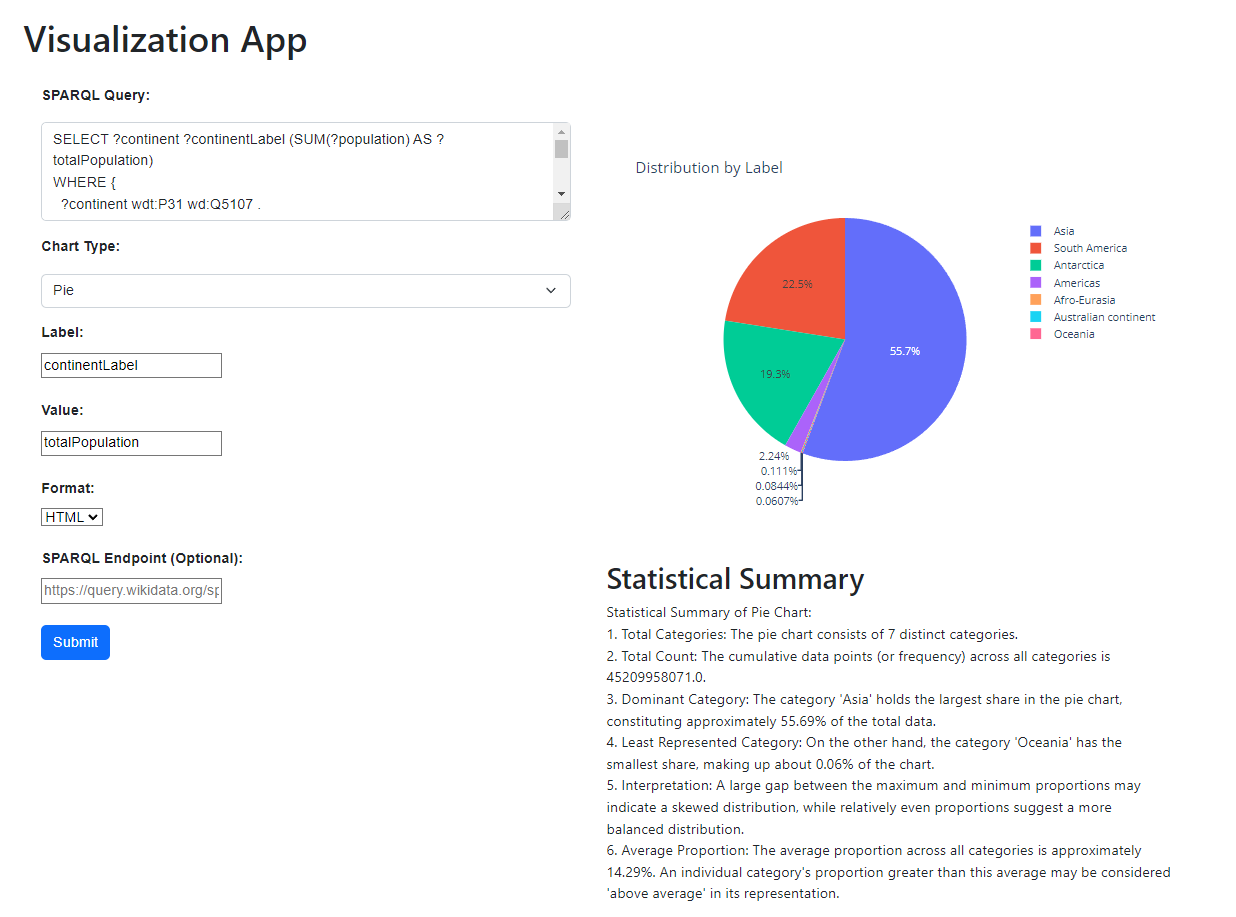

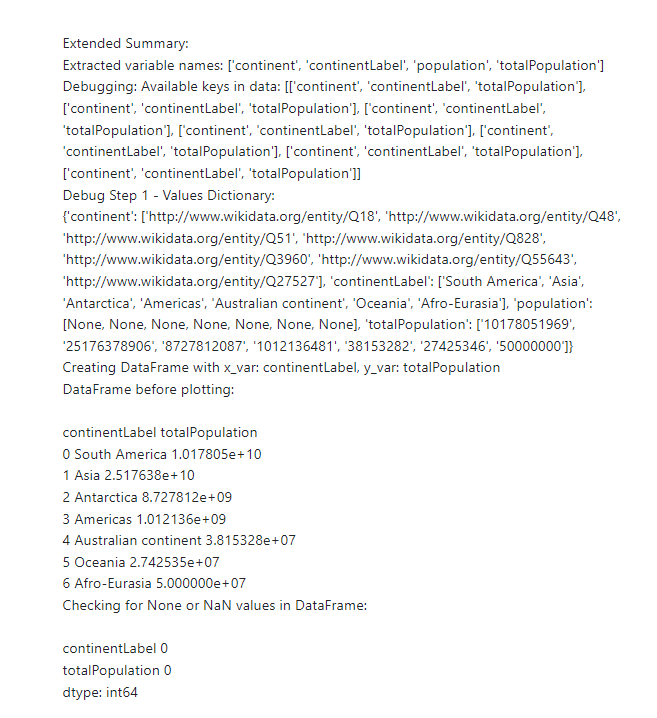

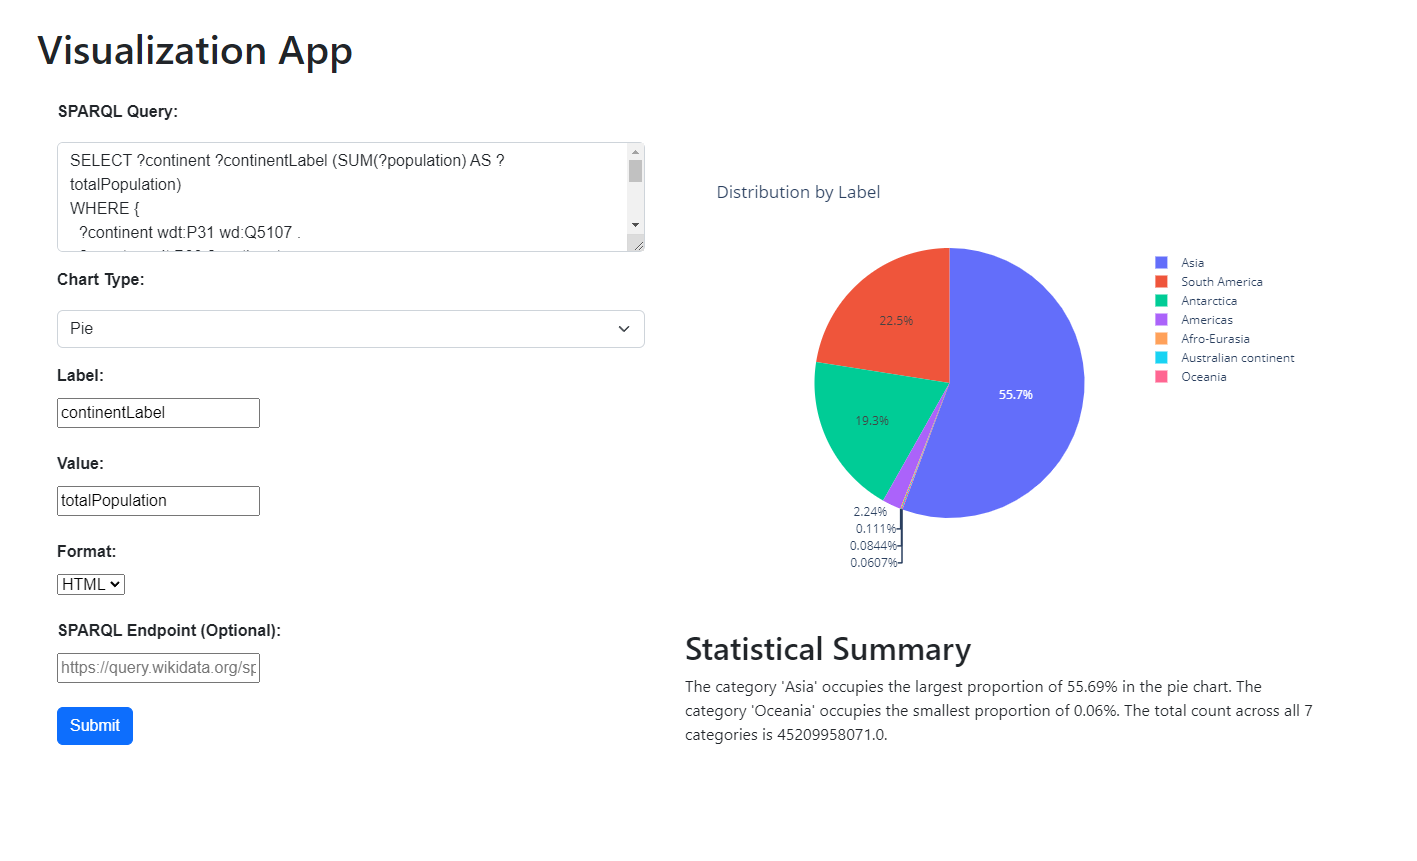

this query has timeout issue
```
SELECT ?country ?countryLabel ?energyType (SUM(?production) AS ?totalProduction)
WHERE {
  ?country wdt:P31 wd:Q6256 .
  ?powerPlant wdt:P17 ?country .
  ?powerPlant wdt:P2051 ?production .
  ?powerPlant wdt:P618 ?energyType .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?country ?countryLabel ?energyType
```

523 results! its too much for pie chart.
 the distribution of land use types in the United States.
```
SELECT ?landUse ?landUseLabel (SUM(?area) AS ?totalArea)
WHERE {
  wd:Q30 wdt:P31 wd:Q6256 .
  ?territory wdt:P17 wd:Q30 .
  ?territory wdt:P2046 ?area .
  ?territory wdt:P1278 ?landUse .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?landUse ?landUseLabel
```

    Label (x-axis): Gender (Male, Female)
    Frequency (y-axis): Number of pandas in each gender group

    Bar chart
    
```
SELECT ?gender (COUNT(?pandaItem) AS ?numberOfPandas)
WHERE {
  ?pandaItem wdt:P31 wd:Q33602 . # giant panda
  OPTIONAL { 
    ?pandaItem wdt:P21 [ rdfs:label ?gender ] .
    FILTER ( LANG(?gender) = "en" ) .
  }
}
GROUP BY ?gender
```
```
# Giant pandas

SELECT
?pandaItem ?englishName ?chineseName ?image ?gender ?studNumber
?fatherItem ?fatherName ?motherItem ?motherName ?dateOfBirth ?dateOfDeath
WHERE
{
  ?pandaItem wdt:P31 wd:Q33602 . # giant panda
  OPTIONAL { ?pandaItem wdt:P21 [ rdfs:label ?gender ] .
             FILTER ( LANG(?gender) = "en" ) . }
  OPTIONAL { ?pandaItem wdt:P18 ?image . }
  OPTIONAL { ?pandaItem p:P528 [ ps:P528 ?studNumber ;
                                 pq:P972 wd:Q46596139 ] . } # International Studbook for Giant Panda
  OPTIONAL { ?pandaItem rdfs:label ?englishName .
             FILTER( LANG(?englishName) = "en" ) . }
  OPTIONAL { ?pandaItem rdfs:label ?chineseName .
             FILTER( LANG(?chineseName) = "zh" ) . }
  OPTIONAL { ?pandaItem wdt:P22 ?fatherItem .
             ?fatherItem rdfs:label ?fatherName .
             FILTER ( LANG(?fatherName) = "en" ) . }
  OPTIONAL { ?pandaItem wdt:P25 ?motherItem .
             ?motherItem rdfs:label ?motherName .
             FILTER ( LANG(?motherName) = "en" ) . }   
  OPTIONAL { ?pandaItem wdt:P569 ?dateOfBirth . }
  OPTIONAL { ?pandaItem wdt:P570 ?dateOfDeath . }
}
```

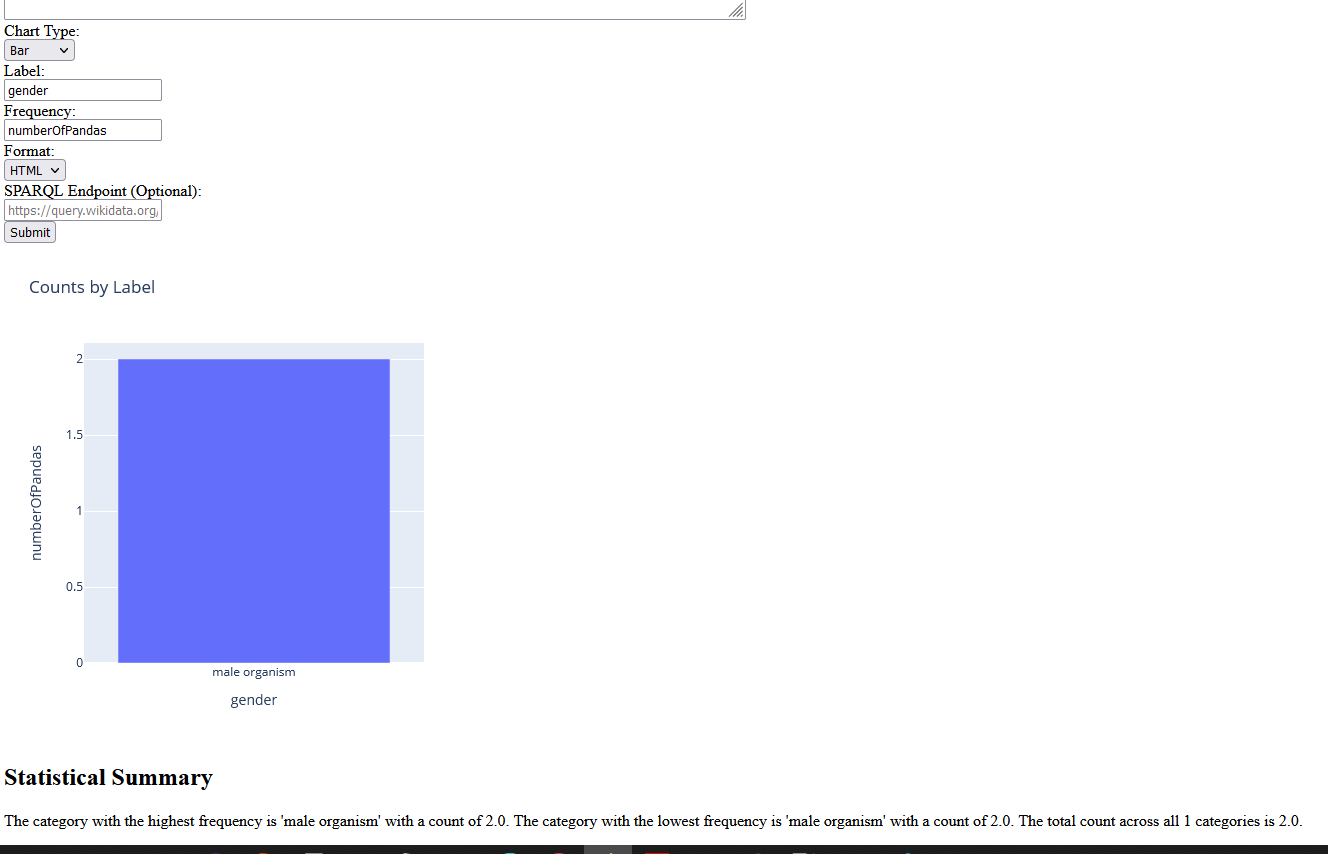


```
SELECT ?artwork ?artworkLabel (SAMPLE(?kms) AS ?kms) (SAMPLE(?height) AS ?height) (SAMPLE(?width) AS ?width) (SAMPLE(?url) AS ?url) WHERE {	
   ?artwork wdt:P195 wd:Q671384 .  # SMK
   ?artwork wdt:P170 wd:Q979541 .  # Martinus Rørby
   SERVICE wikibase:label {
     bd:serviceParam wikibase:language "da" .
   } 
   OPTIONAL {?artwork wdt:P217 ?kms } 
   OPTIONAL {?artwork wdt:P2048 ?height } 
   OPTIONAL {?artwork wdt:P2049 ?width } 
   OPTIONAL {?artwork wdt:P973 ?url } 
 }
GROUP BY ?artwork ?artworkLabel
LIMIT 20
```

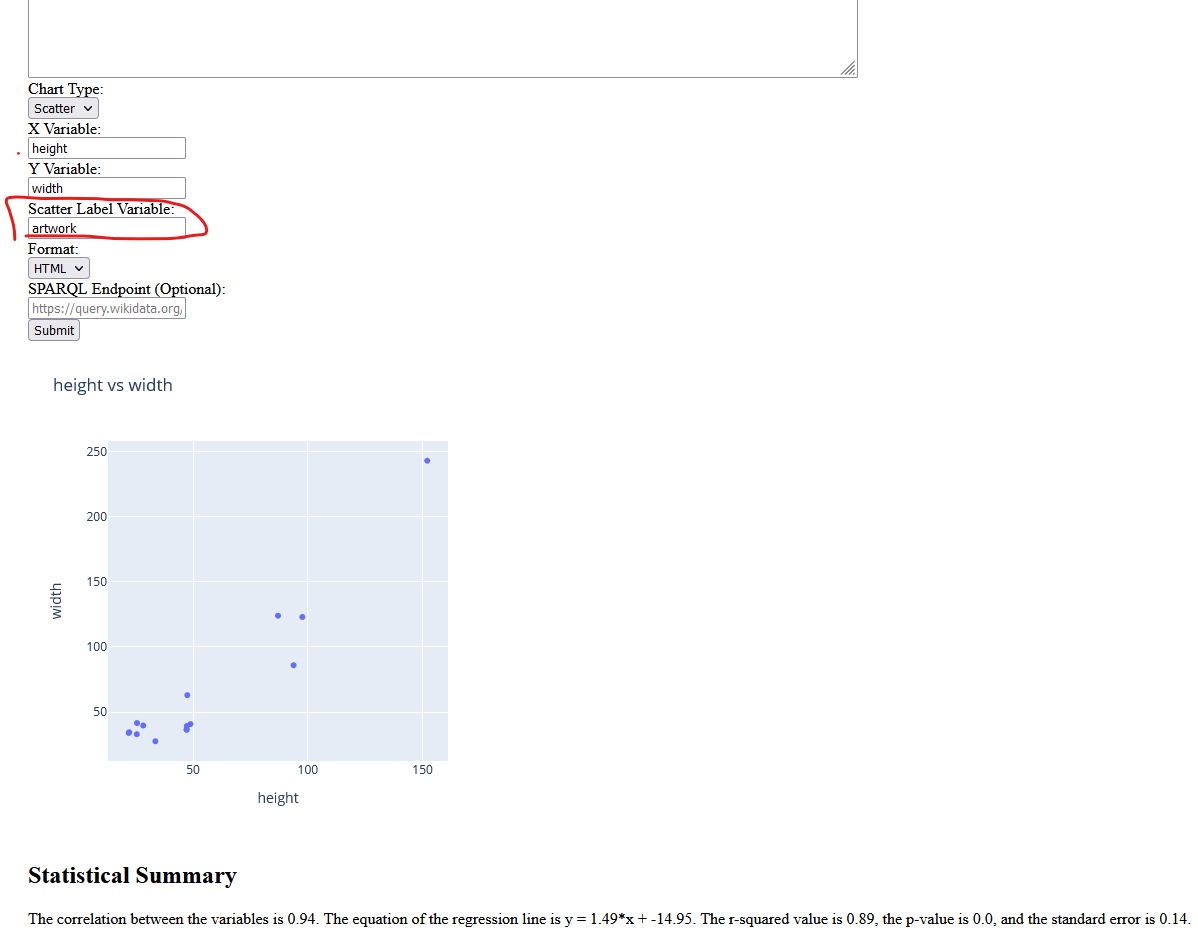

Most cited machine learning papers
scatterplot option
```
SELECT
?paperItem ?title ?firstAuthor ?year
(COUNT(?citationItem) AS ?numOfCitations)
WHERE {
   ?paperItem wdt:P31 wd:Q13442814 ;
              wdt:P921 wd:Q2539 ; # machine learning
              wdt:P2860 ?citationItem .
  OPTIONAL { ?paperItem wdt:P1476 ?title . }
  OPTIONAL { ?paperItem wdt:P577 ?publicationDate . 
             BIND (YEAR(?publicationDate) AS ?year) . }
  OPTIONAL { ?paperItem p:P2093 [ ps:P2093 ?firstAuthorString;
                                  pq:P1545 "1" ] . }
  OPTIONAL { ?paperItem p:P50 [ ps:P50 [ rdfs:label ?firstAuthorLabel ] ;
                                pq:P1545 "1" ] .
             FILTER (LANG(?firstAuthorLabel) = "en") . }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en".
                           ?firstAuthorItem rdfs:label ?firstAuthorLabel . }
  BIND (IF(BOUND(?firstAuthorString), ?firstAuthorString, ?firstAuthorLabel) AS ?firstAuthor) .
}
GROUP BY ?paperItem ?title ?firstAuthor ?year
ORDER BY DESC(?numOfCitations)
LIMIT 50
```

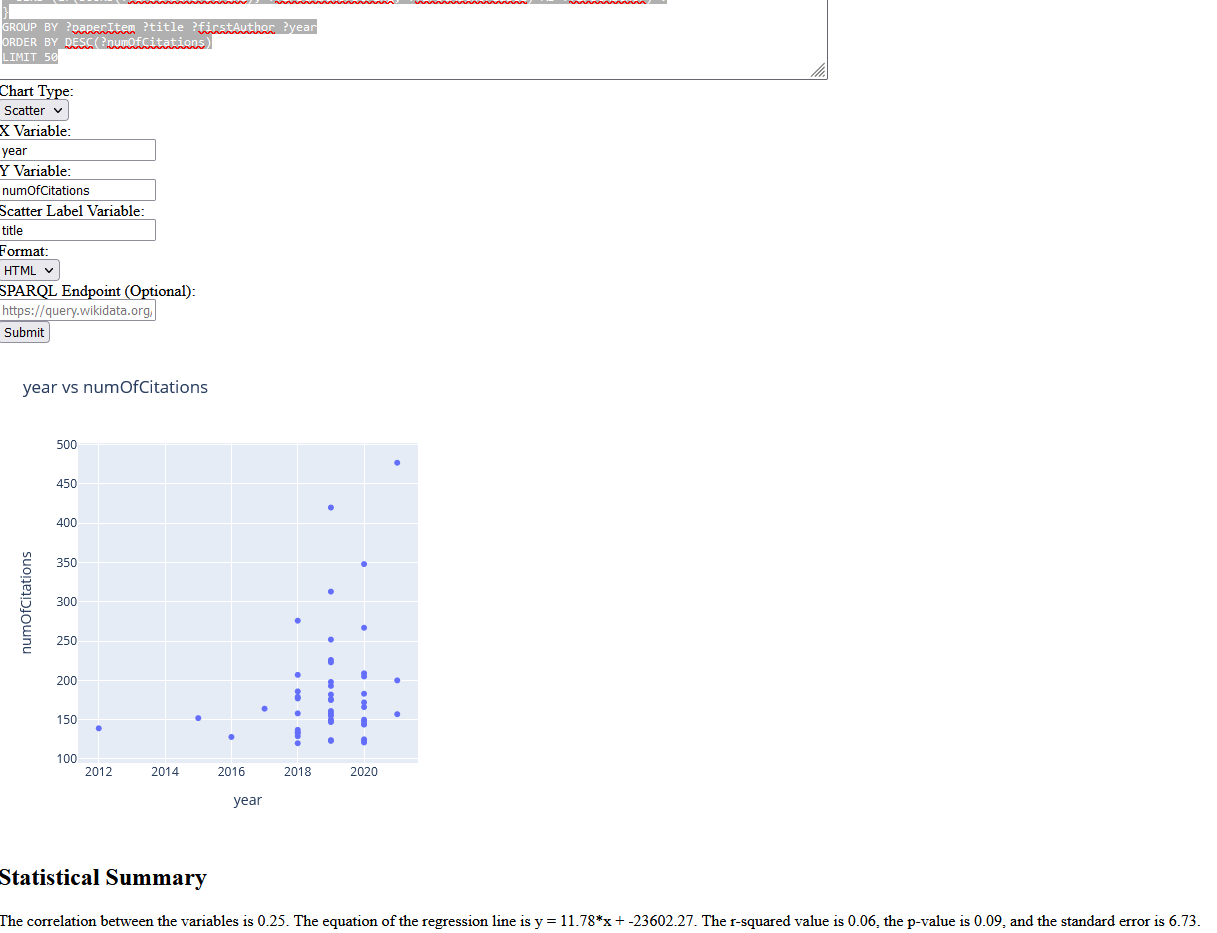

Academy Award-winning females and males and non binary
```
SELECT ?personGender (COUNT(DISTINCT ?personItem) AS ?numberOfWinners)
WHERE {
  ?personAwardItem wdt:P31 wd:Q19020 . # Academy Award
  ?personItem wdt:P166 ?personAwardItem .
  OPTIONAL { ?personItem wdt:P21 ?personGenderItem . }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" .
                           ?personGenderItem rdfs:label ?personGender . }
}
GROUP BY ?personGender
ORDER BY ?personGender
```

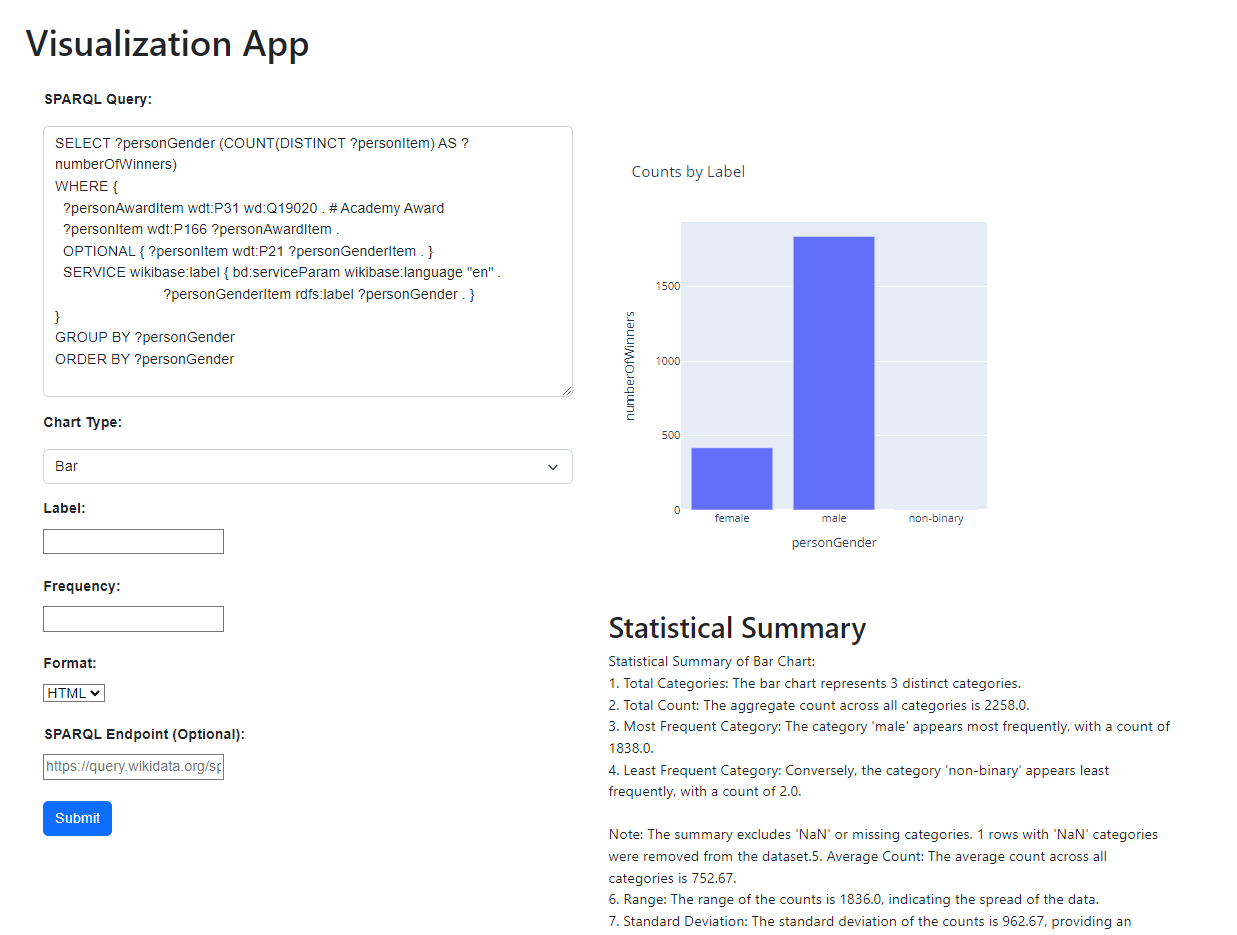

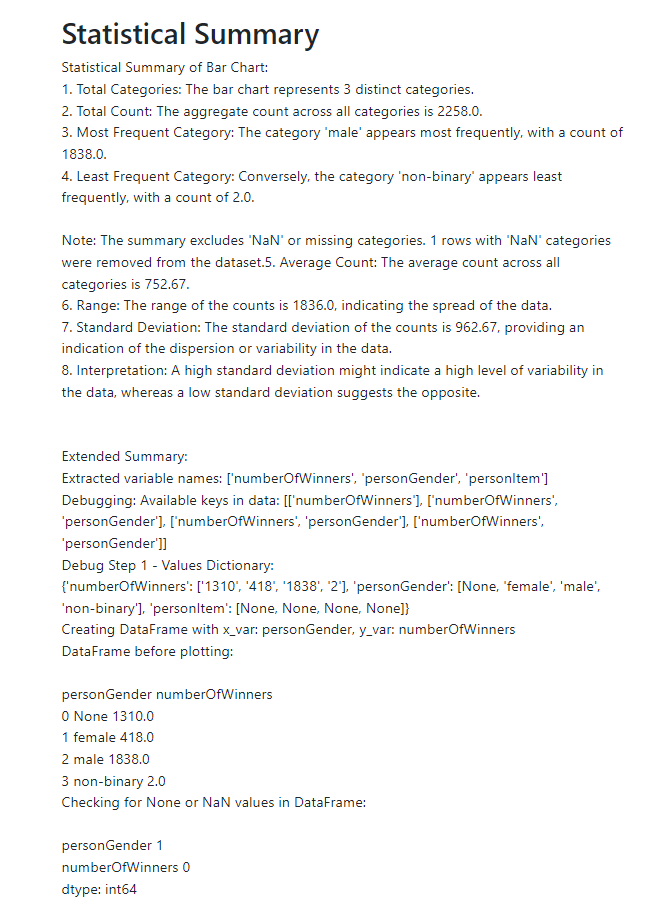

the problem of repeating the same query in short time:

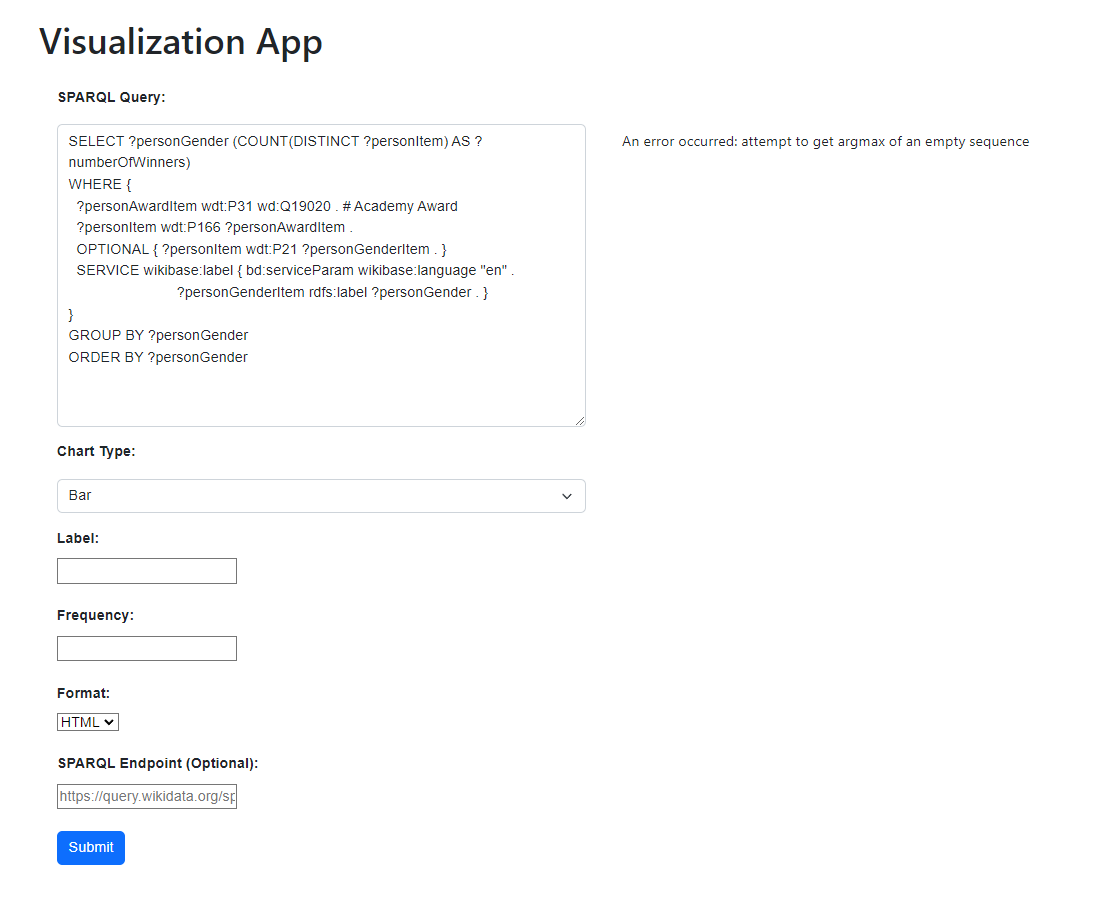

for scatter plot. but it gives usefull error.
```
SELECT DISTINCT
?paintingItem ?paintingName ?image ?artistItem ?artistName ?year ?accessionNumber
WHERE {
  VALUES ?movementItem { wd:Q166713 } . # impressionism or post-impressionism
  ?paintingItem wdt:P31 wd:Q3305213 ; # painting
            wdt:P195 wd:Q160236 ; # MET collection
            wdt:P170 ?artistItem .
  { ?paintingItem wdt:P135+ ?movementItem }
  UNION { ?artistItem wdt:P135+ ?movementItem } .
  OPTIONAL { ?paintingItem wdt:P18 ?image . }
  OPTIONAL { ?paintingItem p:P217 [ ps:P217 ?accessionNumber ;
                                    pq:P195 wd:Q160236 ] }
  OPTIONAL { ?paintingItem wdt:P571 ?date .
             BIND(YEAR(?date) AS ?year) . }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en".
                           ?paintingItem rdfs:label ?paintingName .
                           ?artistItem rdfs:label ?artistName }
}
Limit 10
```

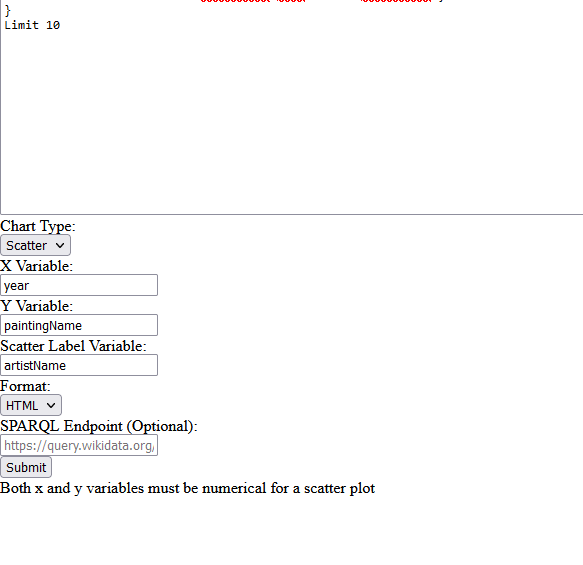

```
PREFIX ex: <http://example.org/>
SELECT ?open_access_status (COUNT(?ep_id) as ?count) WHERE {
    ?ep_id ex:Open_Access ?open_access_status .
    FILTER(?open_access_status = "True" || ?open_access_status = "Unknown")
}
GROUP BY ?open_access_status

```

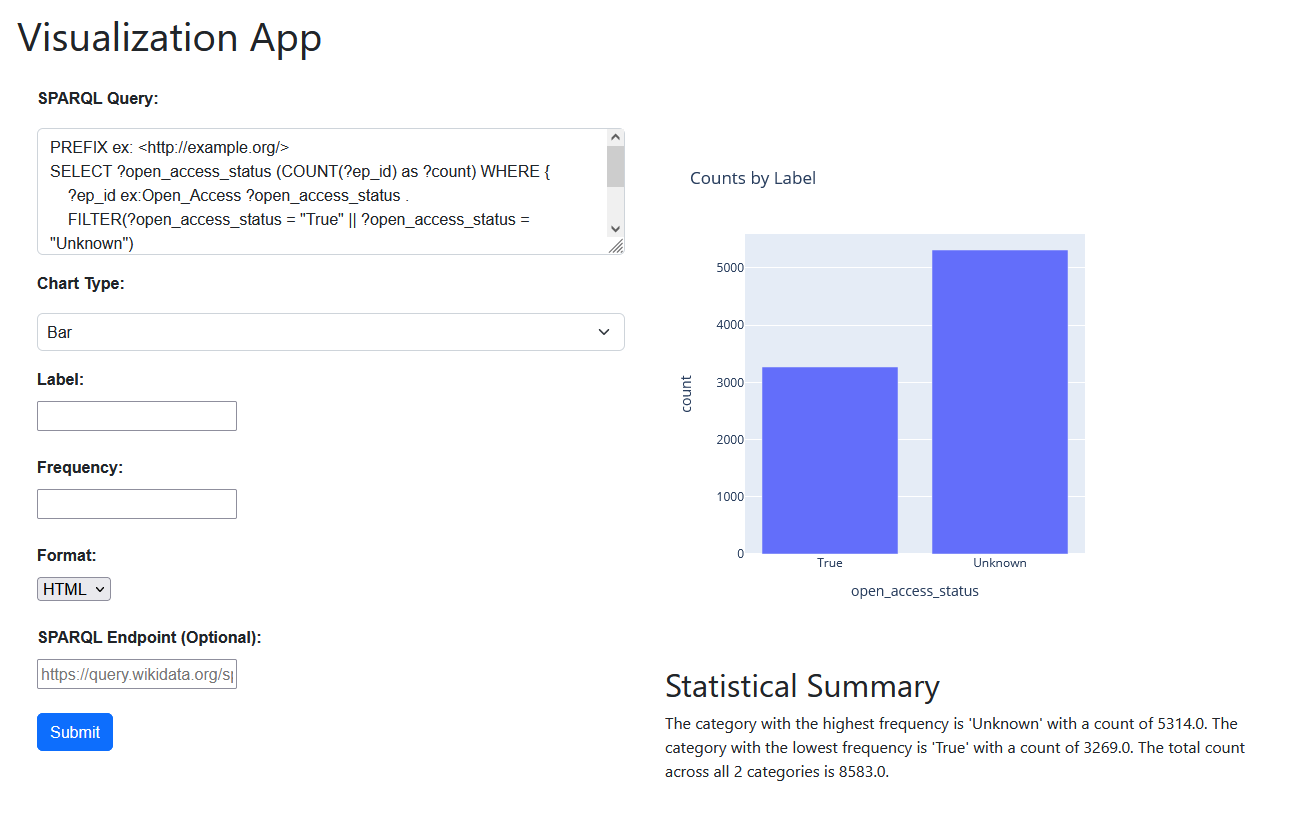

```
    SELECT DISTINCT ?itemLabel ?population
    WHERE
    {
      ?item wdt:P31 wd:Q5098;
            wdt:P1082 ?population .
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]id,en" }
    }
```

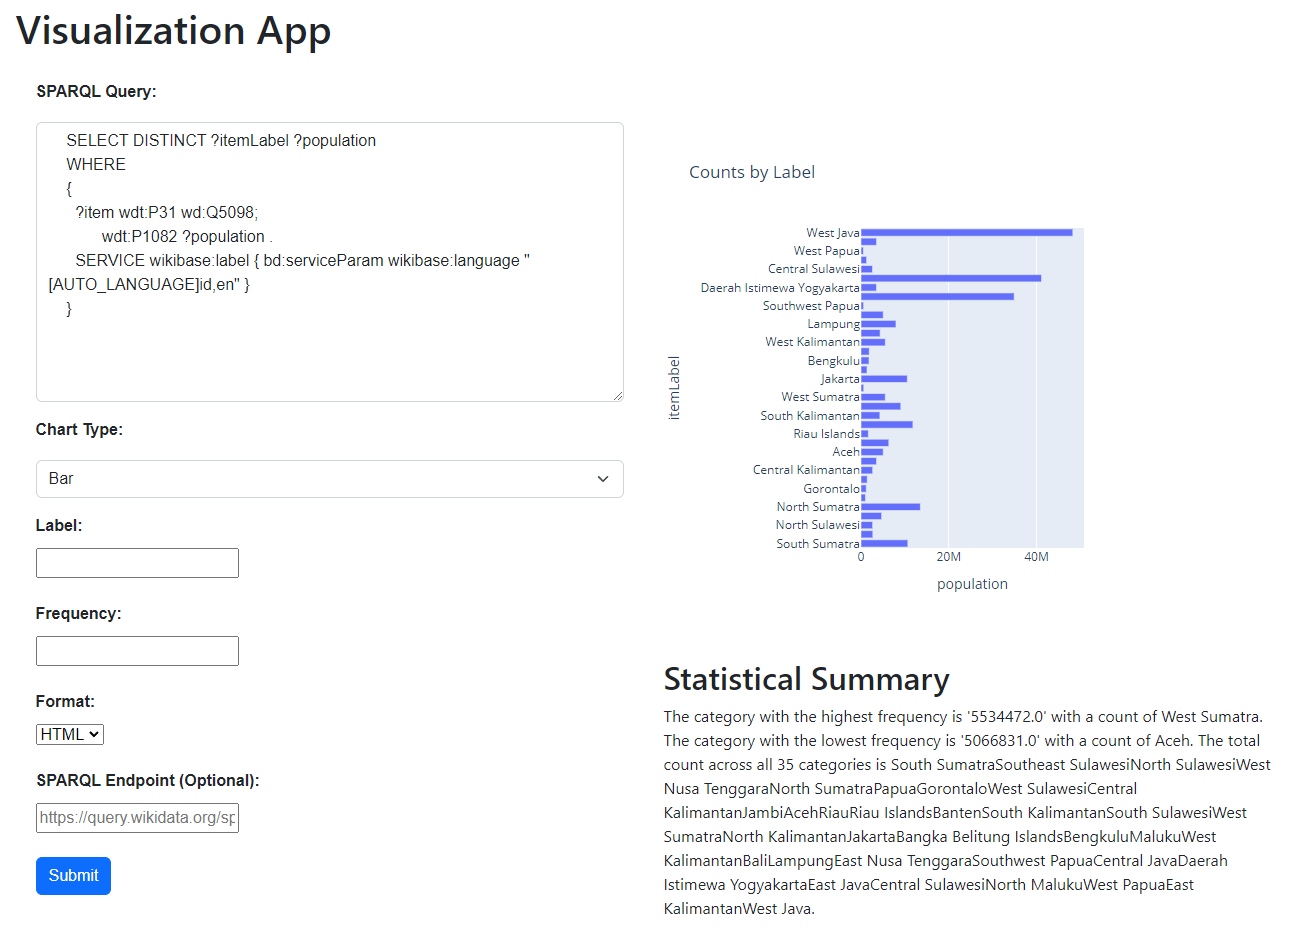

2 labels issues #population of each province in indonesia, thailand and vietnam

```
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
```

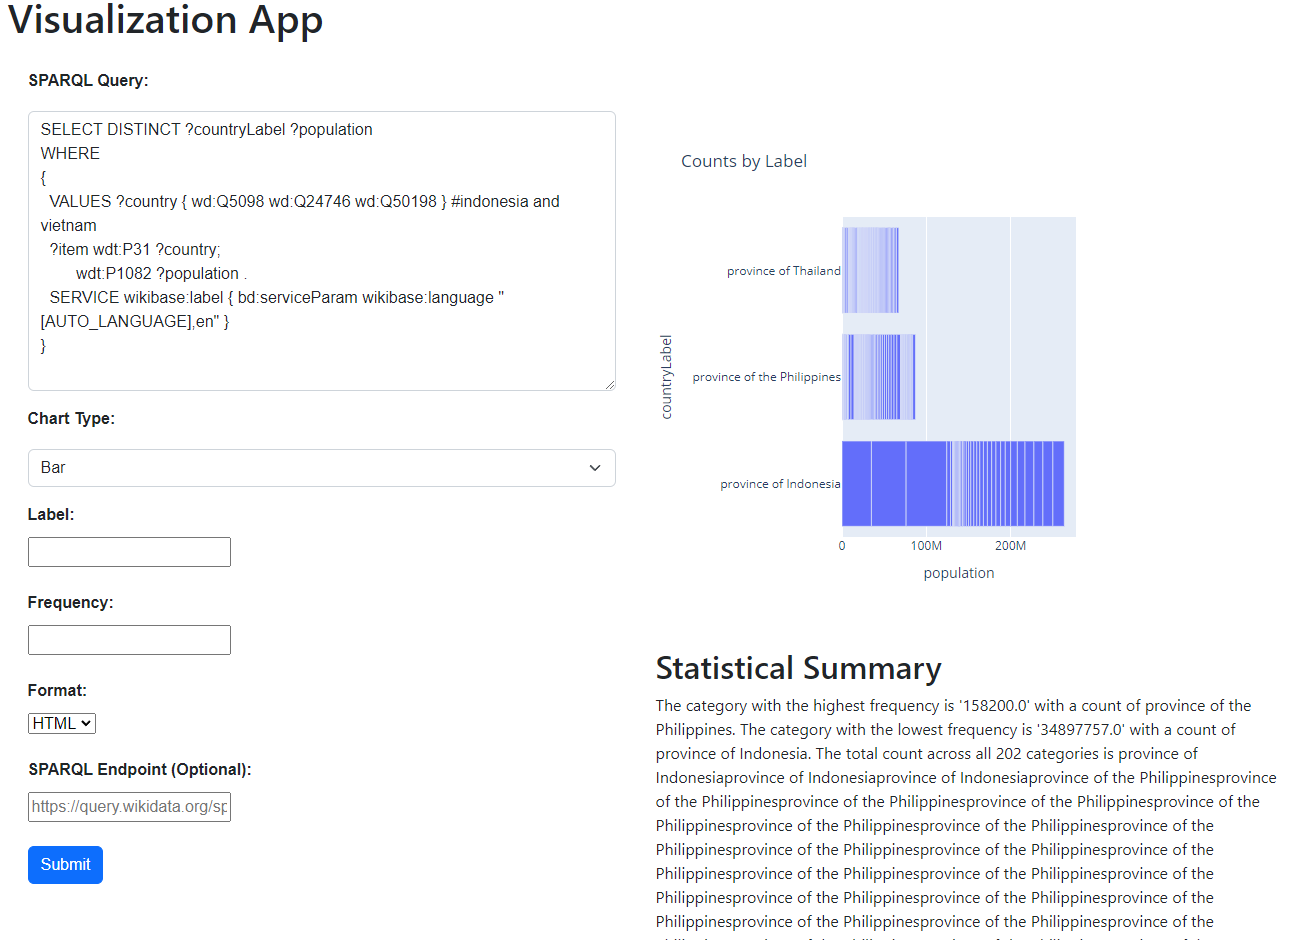

if the labels are not be identified, the plot may produce the error that both vars should be numerical. 
```
#number of languages and area in each of ASEAN country
SELECT ?area ?languages ?countryLabel WHERE {
  {
    SELECT DISTINCT ?country ?countryLabel ?area WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2046 ?area.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?area
  }
  {
    SELECT DISTINCT ?country ?countryLabel (COUNT(?language) AS ?languages) WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2936 ?language.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?languages
  }
}
```

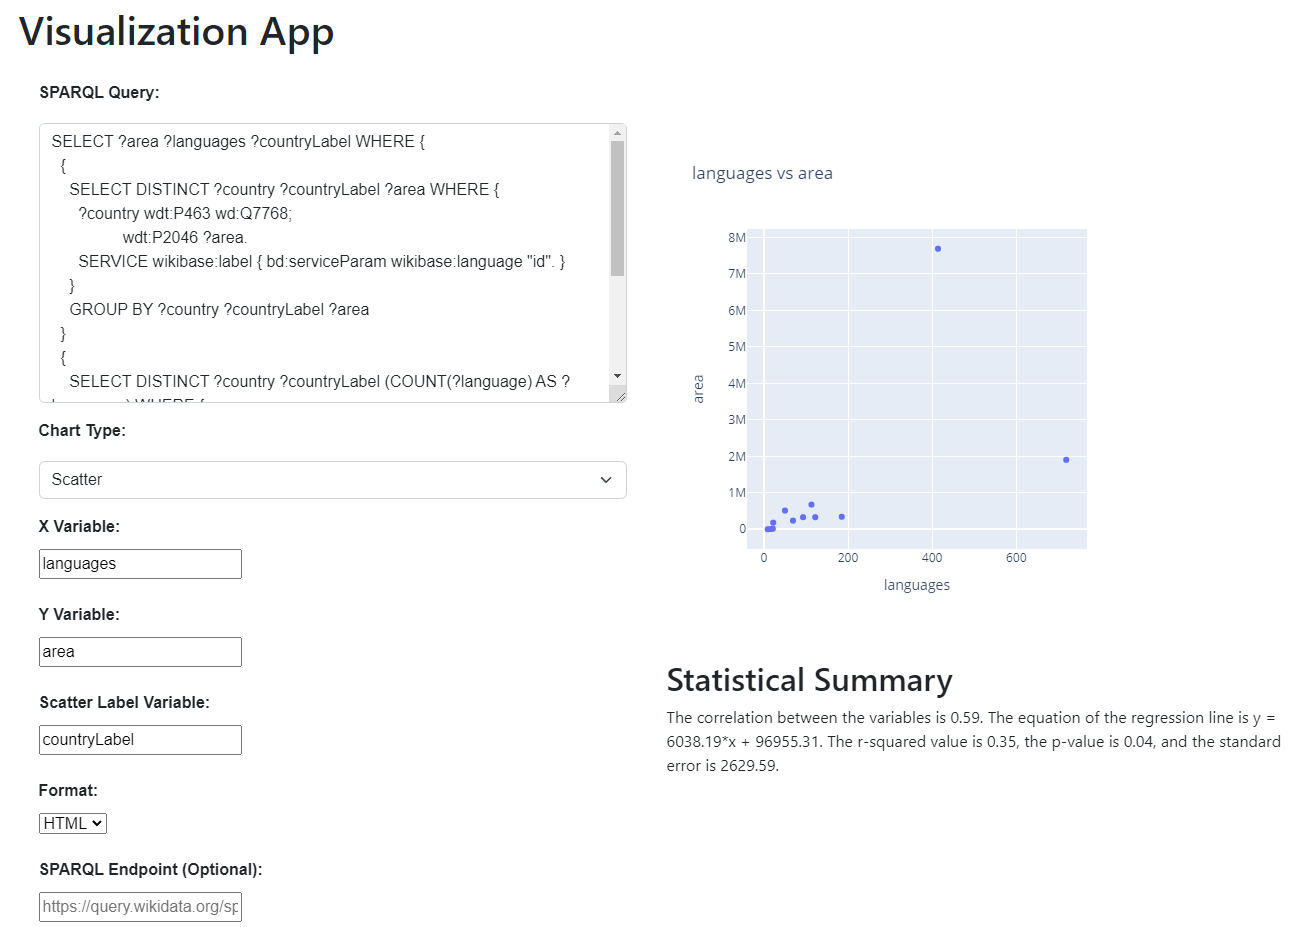

Population vs GDP for ASEAN Countries
This query retrieves the population and GDP for each ASEAN country.
```
SELECT ?population ?GDP ?countryLabel WHERE {
  ?country wdt:P463 wd:Q7768;
           wdt:P1082 ?population;
           wdt:P2131 ?GDP.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
```

#######################################

```
SELECT ?population (COUNT(?airport) AS ?numAirports) ?countryLabel WHERE {
  ?country wdt:P30 wd:Q48;
           wdt:P1082 ?population.
  ?airport wdt:P31 wd:Q1248784;
           wdt:P17 ?country.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?country ?countryLabel ?population
```

If the query is timing out, it's likely due to the high computational cost of gathering and processing the data. One way to limit the computational cost is to reduce the number of records returned. SPARQL offers the LIMIT clause for this purpose, which restricts the number of records returned by a query.

However, because your query involves aggregating data with the COUNT() function, simply limiting the number of output records may not solve the timeout issue. A better approach might be to narrow down the search criteria.

3. Directly Limit the Query
This approach might not be suitable for an aggregation query like yours but is generally useful for limiting result sets.

sparql
Copy code
```
SELECT ?population ?countryLabel WHERE {
  ?country wdt:P30 wd:Q48;
           wdt:P1082 ?population.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
LIMIT 10  # Limit to 10 records
```

##########################################

works bar chart
```
SELECT ?population ?countryLabel WHERE {
  ?country wdt:P30 wd:Q48;
           wdt:P1082 ?population.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
LIMIT 10

```

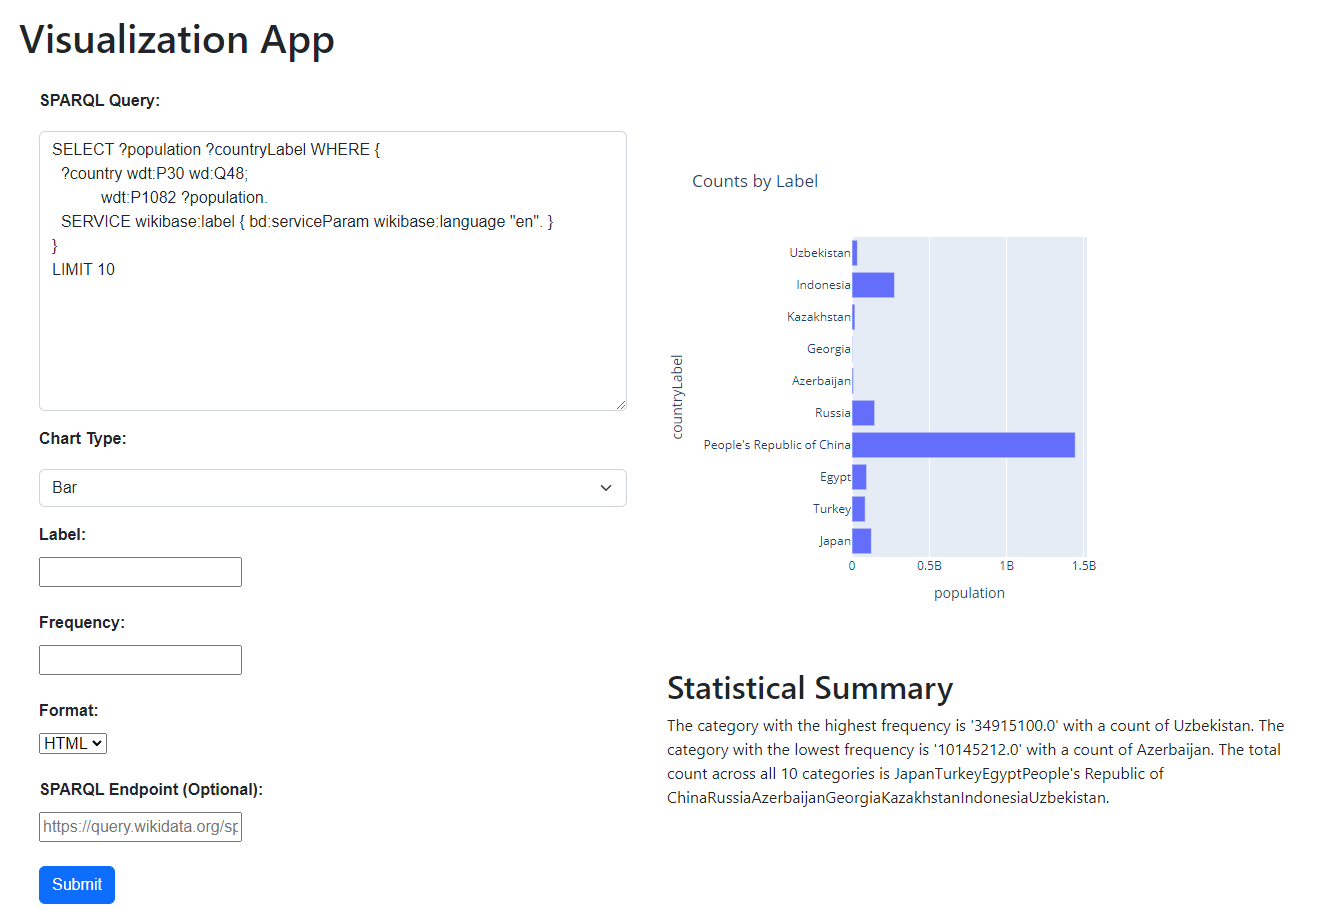

for scatter
```
SELECT ?countryLabel ?population (COUNT(?airport) AS ?numAirports) WHERE {
  VALUES ?country { wd:Q17 wd:Q43 wd:Q79 }  # Japan, Turkey, Egypt
  OPTIONAL { ?country wdt:P1082 ?population. }  # Population
  OPTIONAL { 
    ?airport wdt:P31 wd:Q1248784;  # Instance of airport
            wdt:P17 ?country.  # Country
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?countryLabel ?population
```

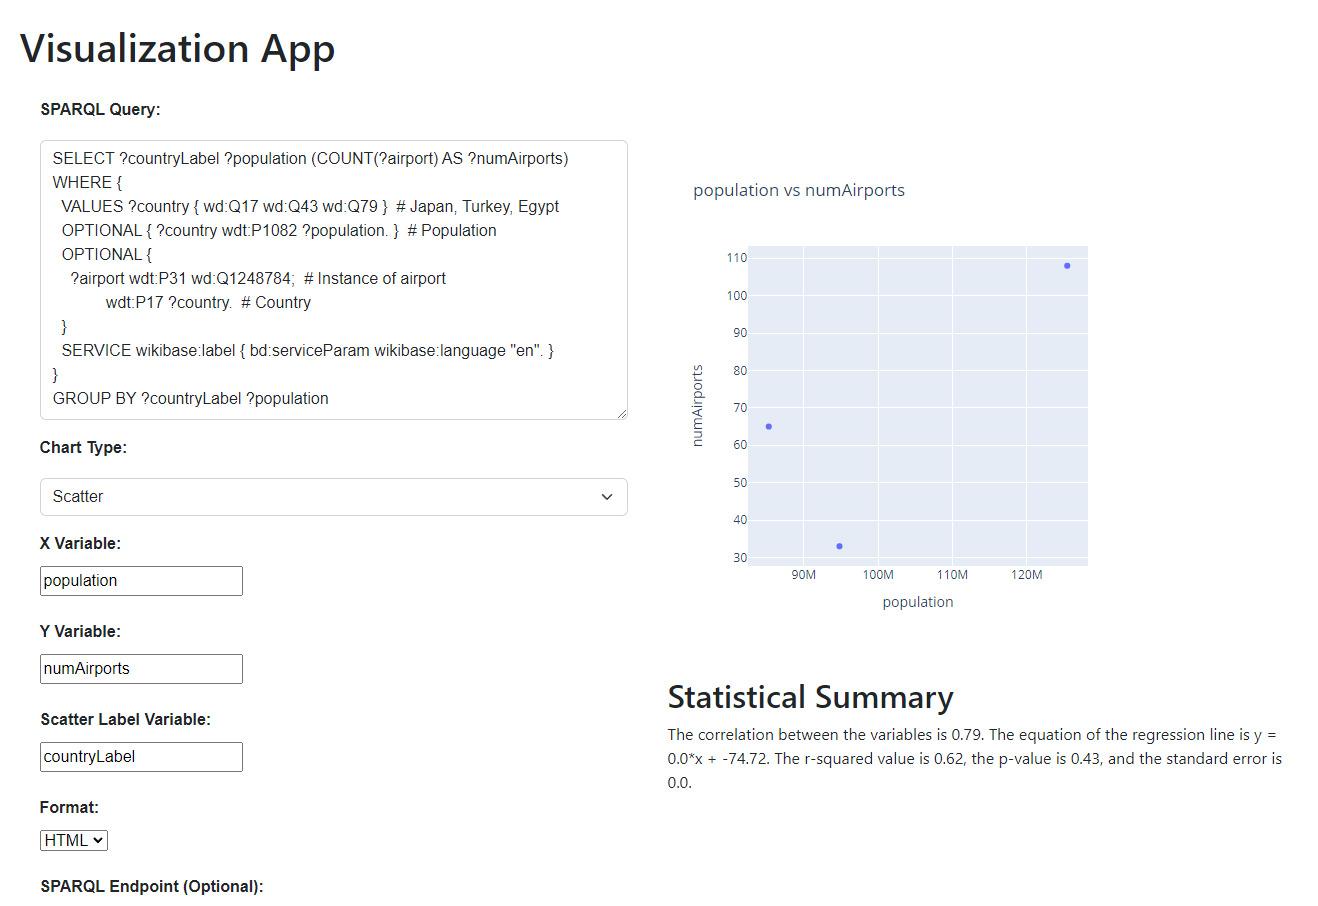

Imagine conducting an exploratory analysis, in order to unveil hidden correlations between country's GDP, population, and the density of its aviation infrastructure. 
The SPARQL query you provided is designed to retrieve data on the population, GDP, and number of airports for specified countries: Japan, Turkey, Egypt, the US, Germany, and China.
```
SELECT ?countryLabel ?population ?GDP (COUNT(?airport) AS ?numAirports) WHERE {
  VALUES ?country { wd:Q17 wd:Q43 wd:Q79 wd:Q30 wd:Q183 wd:Q148 }  # Japan, Turkey, Egypt, US, Germany, China
  OPTIONAL { ?country wdt:P1082 ?population. }  # Population
  OPTIONAL { ?country wdt:P2131 ?GDP. }  # GDP
  OPTIONAL { 
    ?airport wdt:P31 wd:Q1248784;  # Instance of airport
            wdt:P17 ?country.  # Country
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?countryLabel ?population ?GDP

```

has this problem:

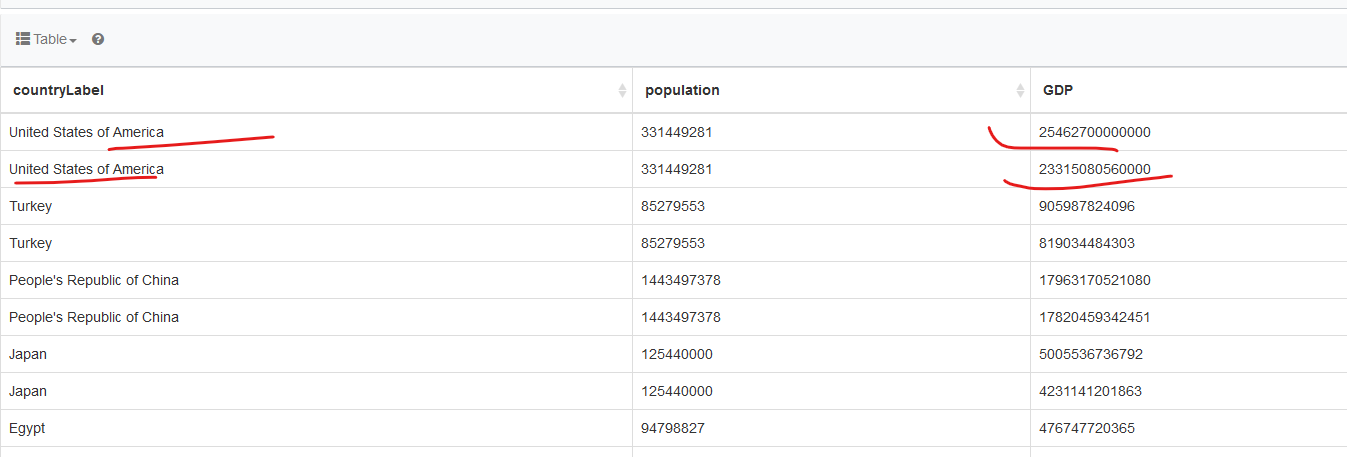

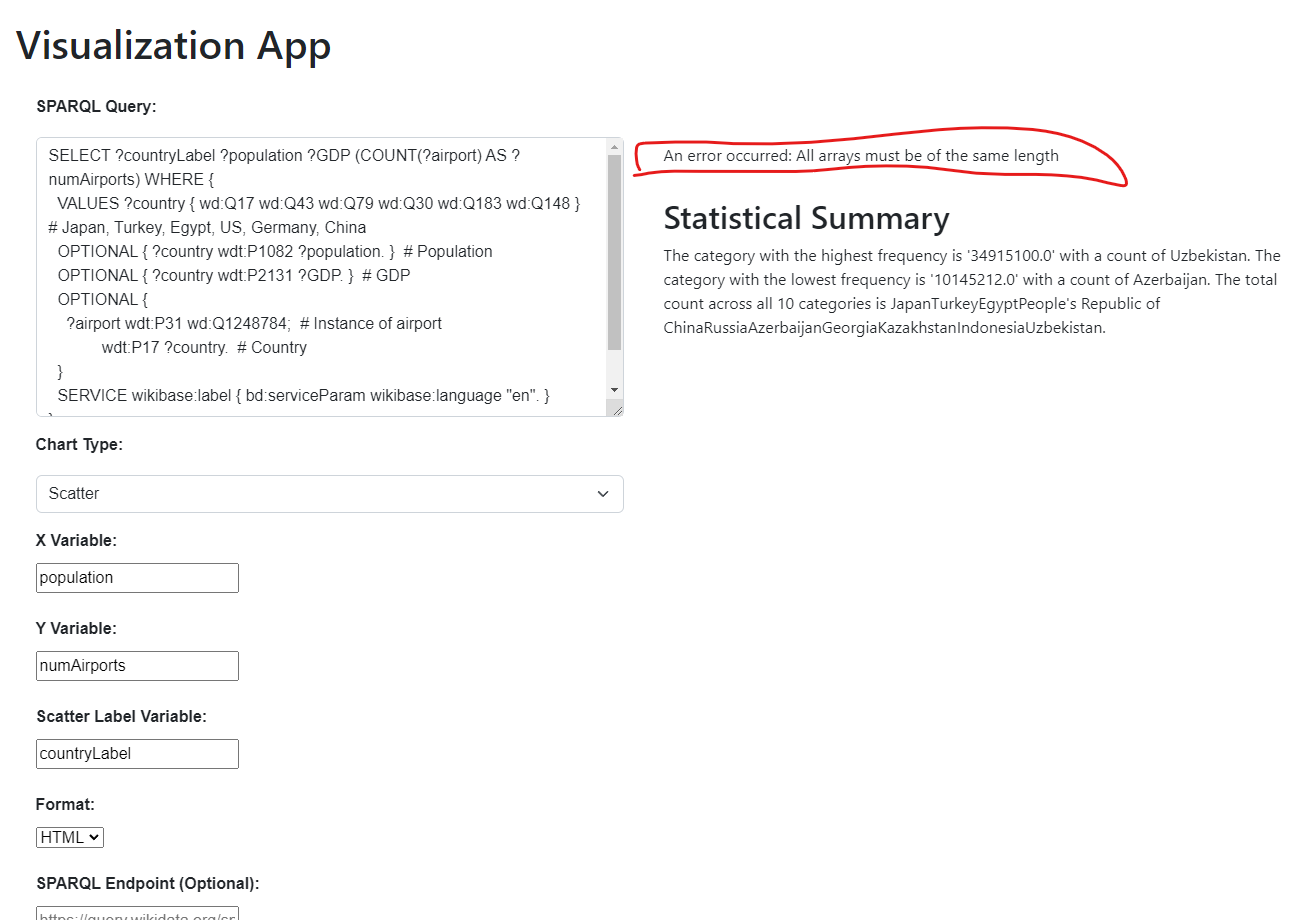

good for bar or pie:

```
SELECT ?countryLabel ?population WHERE {
  VALUES ?country { wd:Q17 wd:Q43 wd:Q79 }  # Japan, Turkey, Egypt
  ?country wdt:P1082 ?population.  # Population
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
```

good for bar or pie:
```
SELECT ?countryLabel (COUNT(?airport) AS ?numAirports) WHERE {
  VALUES ?country { wd:Q17 wd:Q43 wd:Q79 }  # Japan, Turkey, Egypt
  ?airport wdt:P31 wd:Q1248784;  # Instance of airport
          wdt:P17 ?country.  # Country
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?countryLabel
```

for scatter plot
```
SELECT ?countryLabel ?lifeExpectancy ?GDPPerCapita WHERE {
  ?country wdt:P30 wd:Q46;  # Europe
  OPTIONAL { ?country wdt:P2250 ?lifeExpectancy. }  # Life Expectancy
  OPTIONAL { ?country wdt:P2131 ?GDPPerCapita. }  # GDP per Capita
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
```
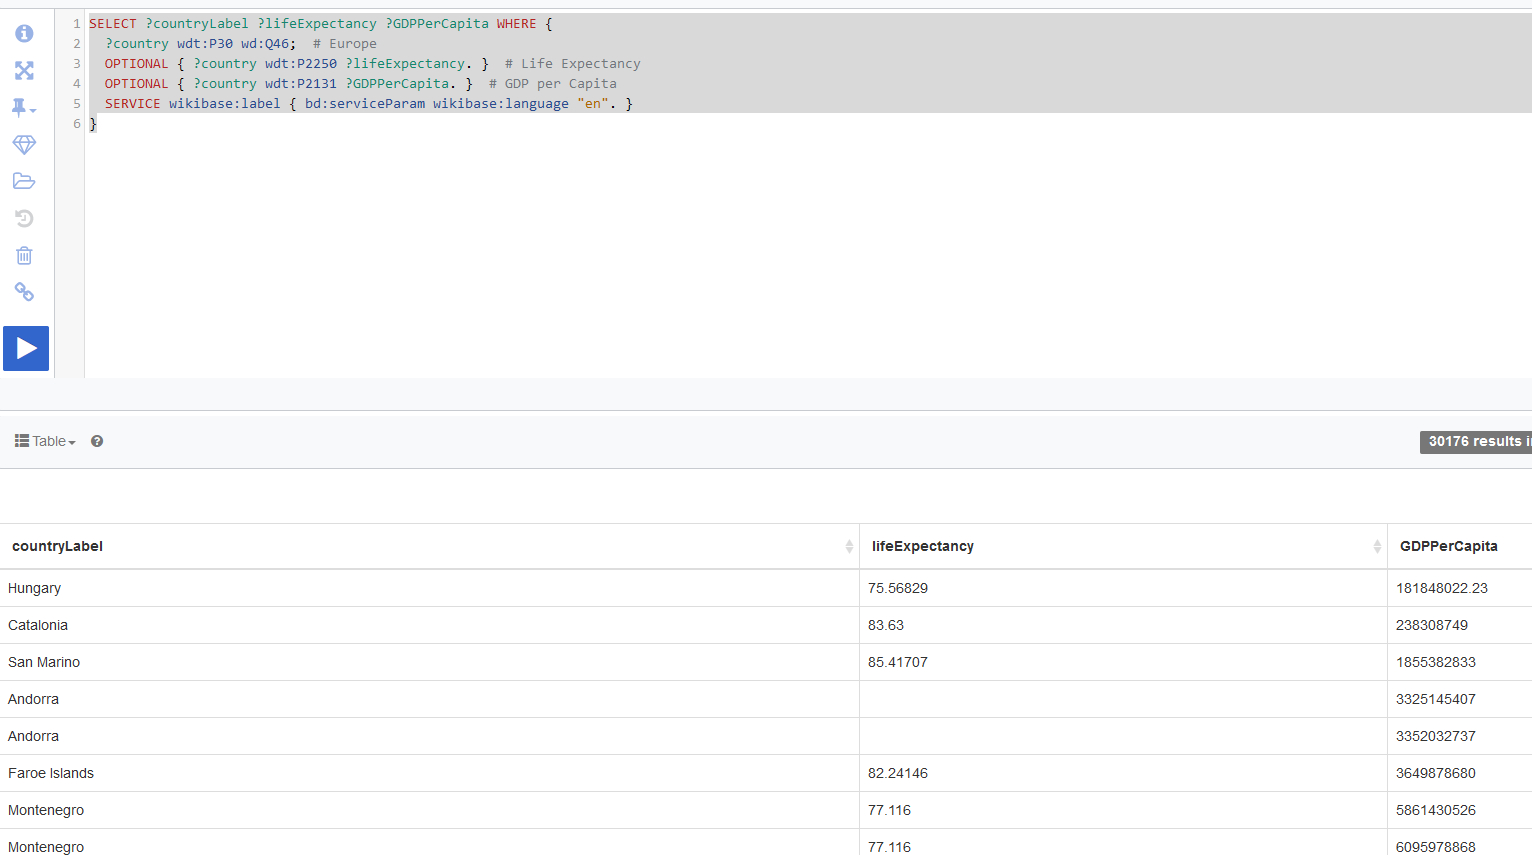

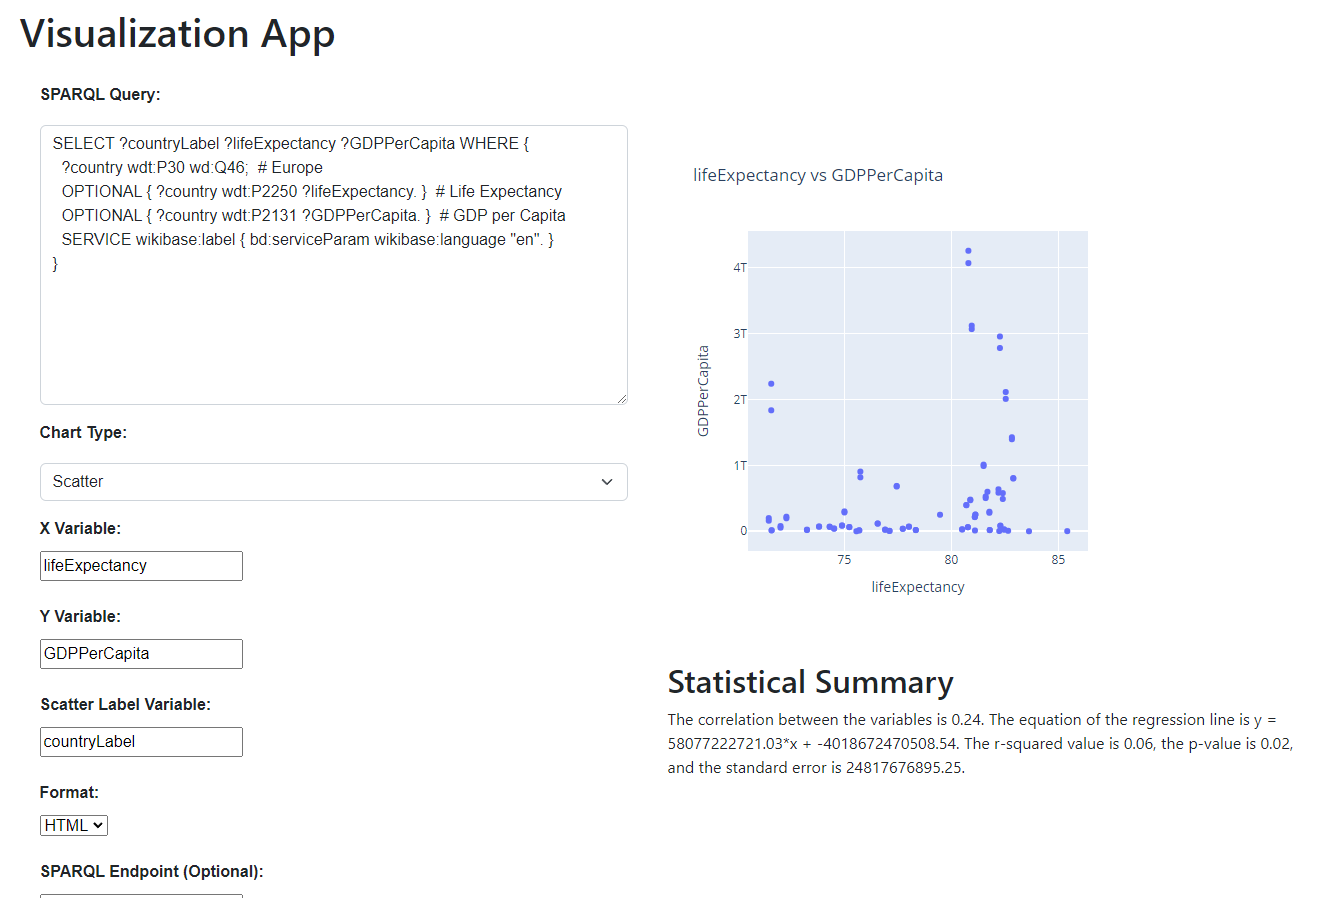

no result for scatter plot
```

SELECT ?countryLabel ?CO2Emissions ?RenewableEnergy WHERE {
  ?country wdt:P463 wd:Q853630;  # G20
  OPTIONAL { ?country wdt:P2196 ?CO2Emissions. }  # CO2 Emissions
  OPTIONAL { ?country wdt:P4030 ?RenewableEnergy. }  # Renewable Energy Production
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

```